In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data = city_data.drop_duplicates('city', keep = 'first')
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
#group be city name
by_city = combined_data.groupby('city')

#Average Fare ($) Per City
avg_fare = by_city.mean()['fare']

#Totals
total_rides = by_city['ride_id'].count()
total_drivers = by_city['driver_count'].mean()

#City Type (Urban, Suburban, Rural)
city_type = city_data.set_index('city')['type']


# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": total_rides,
    "Average Fare": avg_fare,
    "Number of Drivers": total_drivers,
    "Type of City": city_type
})

city_info.head()


,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


In [4]:
#Urban
urban = city_info.loc[city_info["Type of City"]== "Urban"]

#suburban
suburban = city_info.loc[city_info["Type of City"]== "Suburban"]

#rural
rural = city_info.loc[city_info["Type of City"]== "Rural"]

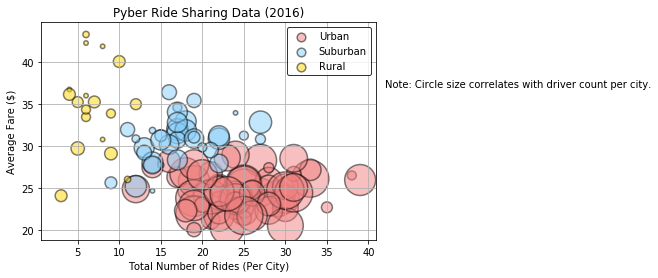

In [14]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare"],\
            color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20,\
            label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"],\
            color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20,\
            label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare"],\
            color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20,\
            label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 37,"Note: Circle size correlates with driver count per city.")
plt.grid(True)
#Add the legend.
plt.legend(loc= "upper right")
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]



### Show plot
plt.show()

## Total Fares by City Type

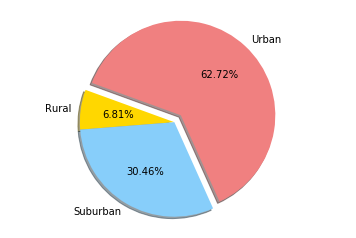

In [27]:
city_fare = combined_data.groupby(["type"])["fare"].sum()
city_fare.index

colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

plt.pie(city_fare, labels = city_fare.index, autopct = "%1.2f%%",\
        colors = colors, explode = explode, shadow = True, startangle = 160)
plt.axis("equal")

#Show the chart.
plt.show()

## Total Rides by City Type

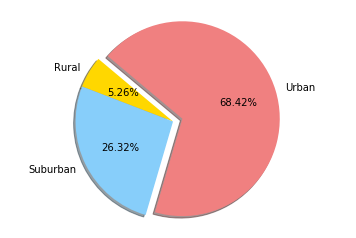

In [26]:
city_rides = combined_data.groupby(["type"])["ride_id"].count()
city_rides.index

colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the first section of the pie chart.
explode = (0, 0, 0.1)

plt.pie(city_rides, labels = city_fare.index, autopct = "%1.2f%%",\
        colors = colors, explode = explode, shadow = True, startangle=140)
plt.axis("equal")

#Show the chart.
plt.show()

## Total Drivers by City Type

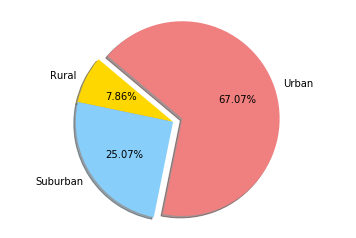

In [25]:
city_drivers = combined_data.groupby(["type"])["driver_count"].mean()
city_drivers.index

colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.
explode = (0, 0, 0.1)

plt.pie(city_drivers, labels = city_fare_pie.index, autopct = "%1.2f%%",\
        colors = colors, explode = explode, shadow = True, startangle=140)
plt.axis("equal")

#Show the pie chart.
plt.show()
